In [4]:
pip install xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [8]:
model_data = pd.read_csv("../../Important Data/optimized_model_data.csv",header=[0,1,2],index_col=[0])

In [9]:
model_data.columns = pd.MultiIndex.from_tuples([('','','genre_top')]+model_data.columns.to_list()[1:])

In [10]:

model_data.dropna(inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [12]:
dictGenre = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [13]:
X = model_data.drop([('','','genre_top')],axis=1)
y = model_data['','','genre_top'].replace(dictGenre)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_66932/1149637687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = model_data['','','genre_top'].replace(dictGenre)


In [14]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [15]:
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Now create sample weights
sample_weights = np.array([class_weights[label] for label in y_train])

In [16]:
model = XGBClassifier(subsample= 0.8, reg_alpha=2.0,reg_lambda=2.0, gamma=2.0, n_estimators= 1500,min_child_weight=5, max_depth= 4, learning_rate= 0.02, colsample_bytree= 0.7,eval_metric='mlogloss',use_label_encoder=False, verbosity=1)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [17]:
model.fit(x_train,y_train,sample_weight=sample_weights,eval_set=[(x_train, y_train),(x_val, y_val)],verbose=True,early_stopping_rounds=25)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.59410	validation_1-mlogloss:1.59463
[1]	validation_0-mlogloss:1.57969	validation_1-mlogloss:1.58062
[2]	validation_0-mlogloss:1.56557	validation_1-mlogloss:1.56693
[3]	validation_0-mlogloss:1.55178	validation_1-mlogloss:1.55356
[4]	validation_0-mlogloss:1.53836	validation_1-mlogloss:1.54050
[5]	validation_0-mlogloss:1.52551	validation_1-mlogloss:1.52811
[6]	validation_0-mlogloss:1.51292	validation_1-mlogloss:1.51602
[7]	validation_0-mlogloss:1.50047	validation_1-mlogloss:1.50410
[8]	validation_0-mlogloss:1.48840	validation_1-mlogloss:1.49248
[9]	validation_0-mlogloss:1.47685	validation_1-mlogloss:1.48130
[10]	validation_0-mlogloss:1.46543	validation_1-mlogloss:1.47032
[11]	validation_0-mlogloss:1.45426	validation_1-mlogloss:1.45955
[12]	validation_0-mlogloss:1.44319	validation_1-mlogloss:1.44908
[13]	validation_0-mlogloss:1.43261	validation_1-mlogloss:1.43893
[14]	validation_0-mlogloss:1.42217	validation_1-mlogloss:1.42879
[15]	validation_0-mlogloss:1.41198	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=2.0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [18]:
y_pred_train = model.predict(x_train)

In [19]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      9003
           1       0.93      0.94      0.93      6532
           2       0.99      0.80      0.89      1991
           3       0.99      0.92      0.95      2681
           4       0.99      0.83      0.90      2360

    accuracy                           0.93     22567
   macro avg       0.96      0.89      0.92     22567
weighted avg       0.93      0.93      0.93     22567



In [20]:
y_pred_val = model.predict(x_val)

In [21]:
print(classification_report(y_pred_val,y_val))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1967
           1       0.81      0.81      0.81      1389
           2       0.43      0.40      0.41       384
           3       0.78      0.75      0.76       552
           4       0.81      0.62      0.71       544

    accuracy                           0.79      4836
   macro avg       0.73      0.70      0.71      4836
weighted avg       0.79      0.79      0.79      4836



In [22]:
y_pred = model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2142
           1       0.81      0.81      0.81      1382
           2       0.38      0.41      0.39       363
           3       0.76      0.83      0.79       532
           4       0.62      0.76      0.68       417

    accuracy                           0.78      4836
   macro avg       0.69      0.73      0.71      4836
weighted avg       0.79      0.78      0.79      4836



In [24]:
evals_result = model.evals_result()

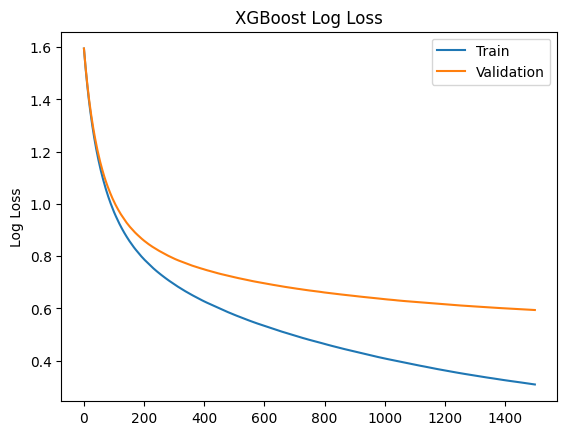

In [25]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

In [26]:
optimized_data_prob = model.predict_proba(X)

In [27]:
optimized_data_prob_final = pd.DataFrame(optimized_data_prob,index=X.index,columns=["Rock","Electronic","Pop","Hip-Hop","Folk"])

In [28]:
optimized_data_prob_final.to_csv("optimized_data_prob_final.csv")

In [70]:
bank_acc = pd.read_csv("bank_acc.csv",index_col=[0],header=[0,1,2])

In [72]:
bank_acc

chroma_cens                                                              \
     kurtosis                                                               
           01        02        03        04        05        06        07   
0   -0.363607  0.010086 -1.228869 -1.166695  0.106115  1.132824  2.960157   

                                 ... mel_spec                               \
                                 ...      std                                
         08        09        10  ...       90        91        92       93   
0 -0.359578  0.287732  4.898821  ...  0.00052  0.000502  0.000493  0.00048   

                                                               
                                                               
         94        95        96        97        98        99  
0  0.000468  0.000465  0.000448  0.000448  0.000439  0.000441  

[1 rows x 1414 columns]

In [76]:
bank_acc_prob = model.predict_proba(bank_acc)

In [82]:
pd.DataFrame(bank_acc_prob).to_csv("bank_acc_prob.csv")